<a href="https://colab.research.google.com/github/mdavistr-cmu/Davis-Troller_DSPN_S25/blob/main/ExerciseSubmissions_Davis-Troller_Exercise17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/principal-component-methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 18: Principal component methods

This homework assignment is designed to give you an intuition on principal component approaches to understanding high dimensional statistical relationships.

Like earlier homework, you will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository.

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

1. Loading data 1/1
2. Correlational structure 4/4
3. Principal Component analysis 3/3
4. Associating with Flanker task performance 3/4

 * 'How many components best explain variance in Flanker task performance' not answered

5. Reflection 2/2

---
## 1. Loading data (1 point)

We are going to look for low dimensional relationships between brain volume measures and working memory capacity.

First, we will need to load the `pls`, `tidyverse`, and `ggplot2` libraries for this assignment.


In [ ]:
install.packages("pls")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(pls)
library(tidyverse)
library(ggplot2)


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Use `read.csv` function to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file in the **hcp_data** folder.

(a) Using the tidyverse tools, make a new dataframe `d1` that only includes the Flanker Task performance (`Flanker_Unadj`) and *all* freesurfer **volume** measures for the right and left hemispheres together. Remove both "na's" and any columns that consist of only zeros.

Hint: Look up using the `ends_with` function to only select variables that end with "_Vol"

Use the `head` function to look at the first few rows of each data frame.

In [ ]:
d <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")

d1 <- d %>%
  select(Flanker_Unadj, ends_with("_Vol")) %>%  # Select Flanker and volume vars
  filter(if_all(everything(), ~ !is.na(.))) %>% # Remove any rows with NA
  select(where(~ !all(. == 0)))                 # Remove columns with all 0s

head(d1)


,Flanker_Unadj,FS_IntraCranial_Vol,FS_BrainSeg_Vol,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,FS_SupraTentorial_Vol,FS_L_WM_Vol,⋯,FS_R_Vessel_Vol,FS_R_ChoroidPlexus_Vol,FS_5thVent_Vol,FS_WM_Hypointens_Vol,FS_OpticChiasm_Vol,FS_CC_Posterior_Vol,FS_CC_MidPosterior_Vol,FS_CC_Central_Vol,FS_CC_MidAnterior_Vol,FS_CC_Anterior_Vol
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,130.42,1864518,1406924,304488,305634,610122,70240,807245,1239692,269963,⋯,80,1613,0,1269,325,800,409,569,522,813
2,112.56,1512540,1109710,240030,243207,483238,56623,664124,957615,203472,⋯,70,1007,0,1155,195,1029,526,578,576,649
3,121.18,1684117,1280171,260695,265243,525938,63869,726206,1106881,247504,⋯,88,1303,0,1279,302,972,589,528,471,858
4,126.53,1816044,1321362,276506,278002,554508,74869,762308,1155067,254742,⋯,81,909,0,1154,296,1065,618,838,729,1072
5,101.85,1437868,1053766,203718,210539,414257,58813,579632,916973,213012,⋯,75,1215,3,377,235,1057,591,538,430,849
6,107.04,1512727,1126655,242489,248807,491296,62092,665024,984952,205342,⋯,93,1331,17,554,258,1033,494,487,489,992


---
## 2. Correlational structure (4 points)

(a) Take a look at the correlation between all of the freesurfer volume measures ("FS_") using the `cor` function. Create a new variable called `fs_cor` that is the correlation matrix for only the freesurfer volumes

In [ ]:
# Create a new variable that only contains Freesurfer volumes
fs_data <- d1 %>%
  select(ends_with("_Vol"))

# Compute the correlation matrix
fs_cor <- cor(fs_data)

# View the correlation matrix (optional)
head(fs_cor)


,FS_IntraCranial_Vol,FS_BrainSeg_Vol,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,FS_SupraTentorial_Vol,FS_L_WM_Vol,FS_R_WM_Vol,⋯,FS_R_Vessel_Vol,FS_R_ChoroidPlexus_Vol,FS_5thVent_Vol,FS_WM_Hypointens_Vol,FS_OpticChiasm_Vol,FS_CC_Posterior_Vol,FS_CC_MidPosterior_Vol,FS_CC_Central_Vol,FS_CC_MidAnterior_Vol,FS_CC_Anterior_Vol
FS_IntraCranial_Vol,1.0000000,0.8977578,0.8400174,0.8439151,0.8452780,0.7885140,0.8751297,0.8851581,0.8311086,0.8278063,⋯,0.1536332,0.4286121,0.08758425,0.2225826,0.3309762,0.3448680,0.1896089,0.1973414,0.2845997,0.4018212
FS_BrainSeg_Vol,0.8977578,1.0000000,0.9448159,0.9482717,0.9502618,0.8689939,0.9664839,0.9958421,0.9502506,0.9482723,⋯,0.2067837,0.4125810,0.04979092,0.3231443,0.3500672,0.3767737,0.2724347,0.2707686,0.3534842,0.4308723
FS_LCort_GM_Vol,0.8400174,0.9448159,1.0000000,0.9844592,0.9960196,0.7897863,0.9821287,0.9485617,0.8282356,0.8220444,⋯,0.1700152,0.3516475,0.02747529,0.3272222,0.2735485,0.2515157,0.1961809,0.2089434,0.2572979,0.3140626
FS_RCort_GM_Vol,0.8439151,0.9482717,0.9844592,1.0000000,0.9961939,0.7925724,0.9830322,0.9518674,0.8330846,0.8307516,⋯,0.1759543,0.3441177,0.03430310,0.3390336,0.2834184,0.2444868,0.1918267,0.2118854,0.2590016,0.3054070
FS_TotCort_GM_Vol,0.8452780,0.9502618,0.9960196,0.9961939,1.0000000,0.7942866,0.9864250,0.9539460,0.8339331,0.8296759,⋯,0.1736941,0.3491995,0.03104854,0.3344959,0.2796276,0.2489306,0.1947377,0.2112533,0.2591679,0.3108966
FS_SubCort_GM_Vol,0.7885140,0.8689939,0.7897863,0.7925724,0.7942866,1.0000000,0.8407289,0.8591265,0.8248311,0.8250502,⋯,0.2308144,0.3810439,0.02854927,0.2779295,0.3280826,0.3636716,0.3169406,0.2701718,0.3320954,0.4041212


(b) Load (and install locally if needed) the `reshape2` library in order to use the `melt` function on the new `fs_cor` object. Use `head` to show the new, melted `fs_cor` object.

In [ ]:
# Install reshape2 if not already installed
if (!require(reshape2)) install.packages("reshape2")
library(reshape2)

# Melt the correlation matrix into long format
fs_cor_melted <- melt(fs_cor)

# View the first few rows
head(fs_cor_melted)


,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,FS_IntraCranial_Vol,FS_IntraCranial_Vol,1.0000000
2,FS_BrainSeg_Vol,FS_IntraCranial_Vol,0.8977578
3,FS_LCort_GM_Vol,FS_IntraCranial_Vol,0.8400174
4,FS_RCort_GM_Vol,FS_IntraCranial_Vol,0.8439151
5,FS_TotCort_GM_Vol,FS_IntraCranial_Vol,0.8452780
6,FS_SubCort_GM_Vol,FS_IntraCranial_Vol,0.7885140


Plot the correlation as a heatmap using `ggplot2`.

Hint: use the `scale_fill_gradient2` function to scale the colors between red and blue, capping the values at -1 and +1.

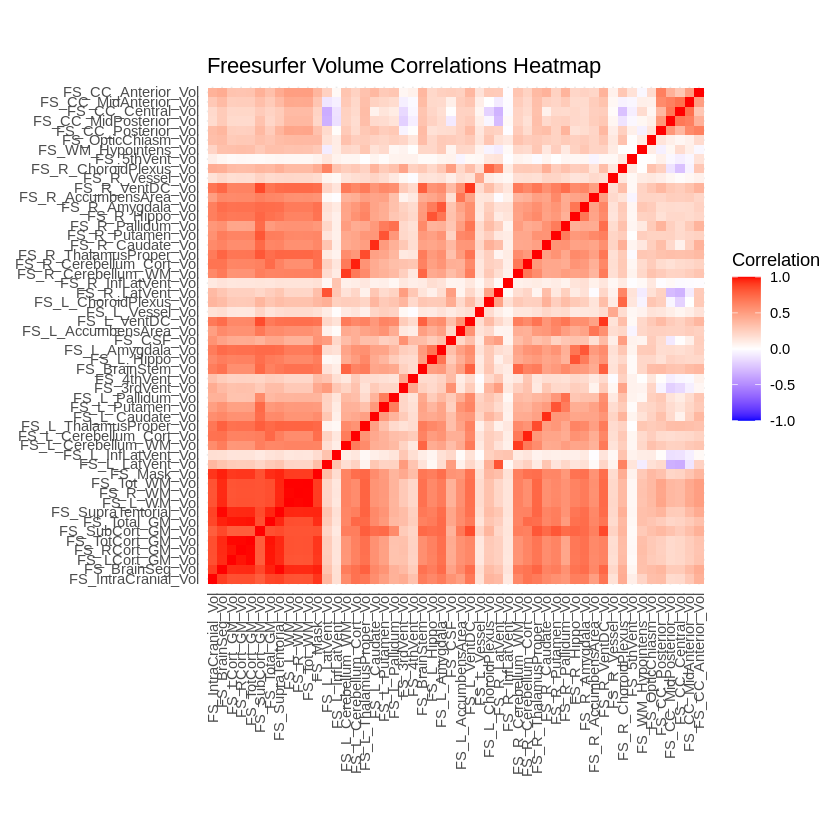

In [ ]:
library(ggplot2)

ggplot(fs_cor_melted, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(
    low = "blue",
    high = "red",
    mid = "white",
    midpoint = 0,
    limit = c(-1, 1),
    name = "Correlation"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
  ) +
  coord_fixed() +
  labs(title = "Freesurfer Volume Correlations Heatmap")


What patterns do you see in the correlations?

Overall, postive correlations between brain areas. Individuals with larger volumes in one brain area often tend to have larger volumes in others.

The bottom left quadrant shows that the total size of brain area is highly correlated. Both sides, and total grey and white matter.



---
## 3. Principal component analysis (3 points)

Let's see how many principal components explain at *at least* 95% of the data.

(a) Create a new object called `fs_d.pca` using the `princomp` function (do not forget to scale the data).


In [ ]:

fs_d.pca <- princomp(fs_data, cor = TRUE)  # cor = TRUE scales the data

fs_d.pca

Call:
princomp(x = fs_data, cor = TRUE)

Standard deviations:
      Comp.1       Comp.2       Comp.3       Comp.4       Comp.5       Comp.6 
4.830423e+00 2.077346e+00 1.657019e+00 1.454278e+00 1.306238e+00 1.162844e+00 
      Comp.7       Comp.8       Comp.9      Comp.10      Comp.11      Comp.12 
1.139950e+00 1.065354e+00 1.046396e+00 1.018248e+00 9.672482e-01 9.260219e-01 
     Comp.13      Comp.14      Comp.15      Comp.16      Comp.17      Comp.18 
9.043349e-01 8.636840e-01 8.033899e-01 7.900450e-01 7.651348e-01 7.469058e-01 
     Comp.19      Comp.20      Comp.21      Comp.22      Comp.23      Comp.24 
7.329054e-01 7.163731e-01 6.694702e-01 6.454345e-01 6.365545e-01 6.103720e-01 
     Comp.25      Comp.26      Comp.27      Comp.28      Comp.29      Comp.30 
5.677509e-01 5.611611e-01 5.544763e-01 5.399729e-01 5.136412e-01 4.820627e-01 
     Comp.31      Comp.32      Comp.33      Comp.34      Comp.35      Comp.36 
4.700835e-01 4.543249e-01 4.395461e-01 4.127669e-01 3.909311e-01 3.70

(b) Calculate the cumulative variance explained (not unique variance explained as in the tutorial) across the principal components and plot the results using `ggplot`.

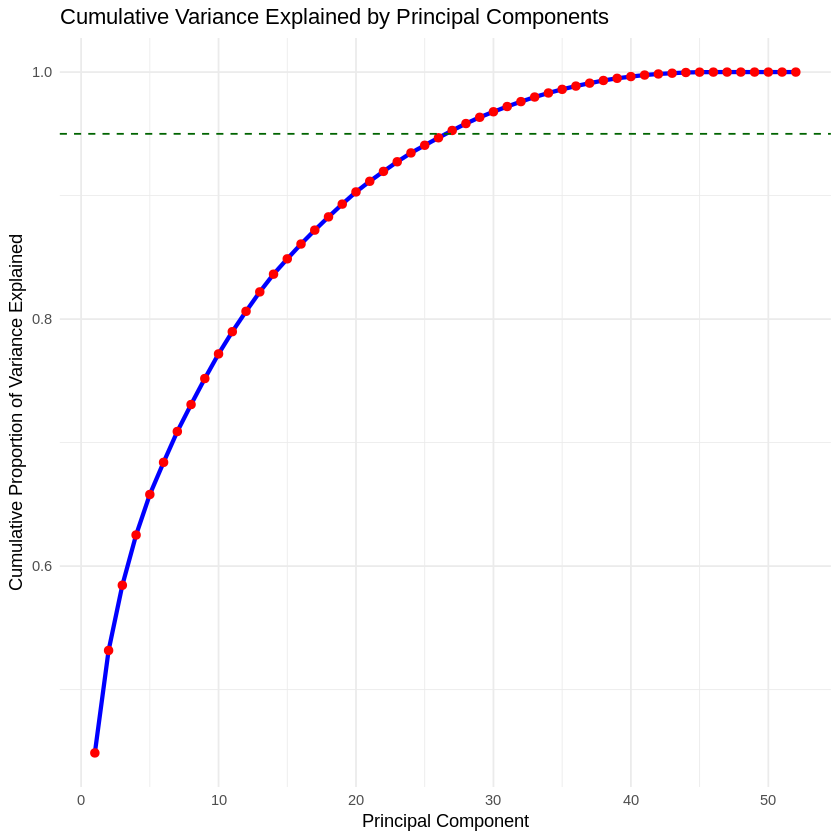

In [ ]:
# Create a data frame with variance explained
var_df <- data.frame(
  PC = 1:length(fs_d.pca$sdev),
  Variance = fs_d.pca$sdev^2,
  CumulativeVariance = cumsum(fs_d.pca$sdev^2) / sum(fs_d.pca$sdev^2)
)

# Load ggplot2 if not already loaded
library(ggplot2)

# Plot cumulative variance explained
ggplot(var_df, aes(x = PC, y = CumulativeVariance)) +
  geom_line(color = "blue", linewidth = 1.2) +
  geom_point(color = "red", size = 2) +
  geom_hline(yintercept = 0.95, linetype = "dashed", color = "darkgreen") +
  labs(title = "Cumulative Variance Explained by Principal Components",
       x = "Principal Component",
       y = "Cumulative Proportion of Variance Explained") +
  theme_minimal()



(c) Determine exactly how many principal components explain at least 95% of the variance.

Hint: Look up the `which` function.

In [ ]:
# Find the number of principal components that explain at least 95% of the variance
num_pc_95 <- which(var_df$CumulativeVariance >= 0.95)[1]

# Print result
num_pc_95



[1] 27

What does this tell you about the underlying dimensionality of the brain volume measures?

> 27 PCs suggests a moderately high-dimensional structure in brain volume data, where several factors, potentially related to different regions or functional groupings, are influencing the variance.


---
## 4. Associating with Flanker task peformance (4 points)

Now apply PCR to the `d1` object you created at the beginning (which includes the Flanker task scores) to find how freesurfer volumes predict Flanker task performance. Set the random seed to "2". Use cross-validation as the validation type and don't forget to scale your data. Show the `summary` of the model fit.

Hint: If you receive an error applying the "scale=TRUE" flag, then you likely still have columns of all zeros somewhere in your data table.

In [ ]:
# Set random seed for reproducibility
set.seed(123)

# Apply PCR with cross-validation
pcr_model <- pcr(Flanker_Unadj ~ ., data = d1, scale = TRUE, validation = "CV")

# Show the summary of the model fit
summary(pcr_model)



Data: 	X dimension: 1113 52 
	Y dimension: 1113 1
Fit method: svdpc
Number of components considered: 52

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           10.08    9.924    9.926    9.931    9.918    9.925    9.907
adjCV        10.08    9.923    9.925    9.930    9.916    9.922    9.904
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       9.883    9.887    9.893     9.891     9.900     9.916     9.906
adjCV    9.880    9.883    9.890     9.887     9.896     9.912     9.901
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV        9.910     9.920     9.917     9.886     9.861     9.864     9.873
adjCV     9.905     9.916     9.912     9.877     9.853     9.857     9.865
       21 comps  22 comps  23 comps  24 comps  25 comps  26 comps  27 comps
CV        9.884     9.883     9.893     9.899     9.910     9.913     9.904
adjCV     9.876  

(b) Use the `validationplot` function to evaluate the bias-variance tradeoff using the cross-validated mean squared-error for each component.

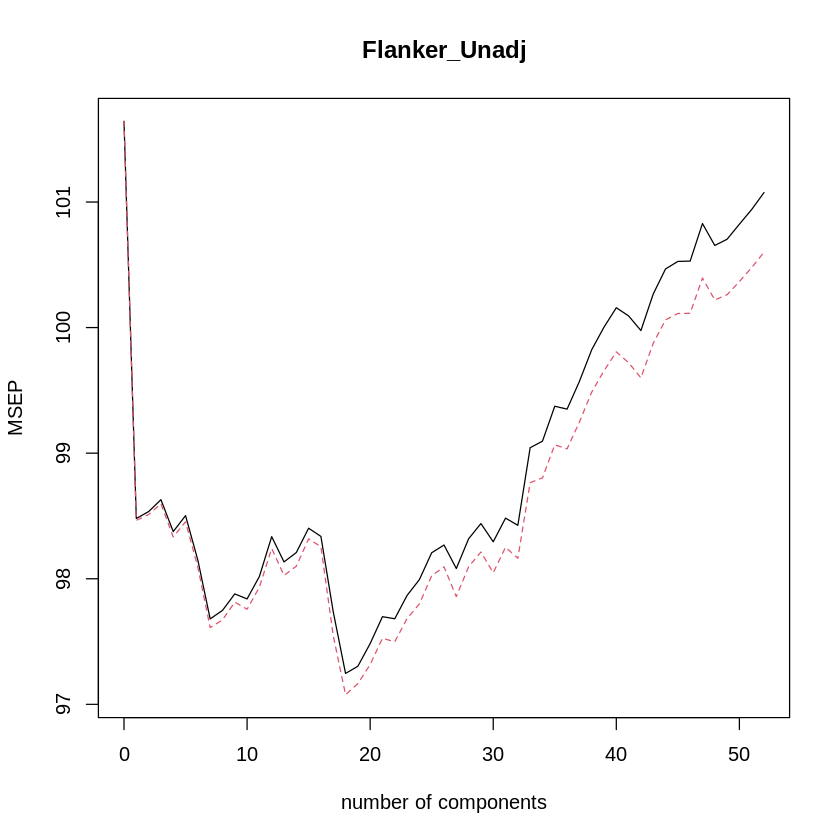

In [ ]:
# Plot the cross-validated MSE for each component
validationplot(pcr_model, val.type = "MSEP")



(c) Extract the MSEP values of the cross validated fit ("CV" not "adj_CV") from the model object using the `MSEP` funtion. Create a new array of these values. Use the `drop` function to remove the singleton dimension (the original array is 2x1x53 and we want a 2x53 object). Find the minimum value of the first row (the "CV").

In [ ]:
msep_values <- MSEP(pcr_model)
cv_msep_values <- msep_values$val[1, , ]


str(cv_msep_values)
min_cv_msep <- min(cv_msep_values)
min_cv_msep


 Named num [1:53] 101.6 98.5 98.5 98.6 98.4 ...
 - attr(*, "names")= chr [1:53] "(Intercept)" "1 comps" "2 comps" "3 comps" ...


[1] 97.24604

What what does this plot tell you about how many components best explain variance in Flanker task performance?

> The minimum value of 97.25 for the cross-validation (CV) MSEP indicates the point at which the model's performance (in terms of predictive accuracy) is optimal.

---
## 5. Reflection (2 points)

Compare the number of components that explain variance in X alone (the brain volumes) to the number of components that explain performance in the Flanker task. What does the difference in these two numbers tell you about how variation in brain volumes relates to task performance?

> The MSEP minimum of 97.25 indicates that fewer components are needed to accurately predict Flanker task performance, which suggests that task performance depends on a smaller, more focused subset of brain volume measures.
Thus, while brain volumes require 27 components to capture most of their variance, Flanker task performance can be predicted with fewer components, implying a simpler, more direct relationship between brain structure and task performance.

**DUE:** 5pm EST, April 15, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*